<a href="https://colab.research.google.com/github/halaaab/IT_326-Project-Group-1/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT326 – Phase 2:Preprocessing Dataset: Breast Cancer Wisconsin (Diagnostic)–UCI Repository**

**Read Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression, Lasso
import seaborn as sns
import pickle
import jinja2

data = pd.read_csv('DataMiningSet.csv')



# **Attributes’ description table:**

In [ ]:
import pandas as pd
from IPython.display import display

data = {
    "Attribute Name": [
        "id", "diagnosis",
        "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
        "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
        "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
        "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
    ],
    "Description": [
        "ID number", "Diagnosis (B = benign, M = malignant)",
        "Mean radius (mean of distances from center to points on perimeter)",
        "Mean texture (standard deviation of gray-scale values)",
        "Mean perimeter length",
        "Mean area of the cell nuclei",
        "Mean smoothness (local variation in radius lengths)",
        "Mean compactness (perimeter^2 / area - 1.0)",
        "Mean concavity (severity of concave portions of the contour)",
        "Mean concave points (number of concave portions of the contour)",
        "Mean symmetry",
        "Mean fractal dimension (‘coastline approximation’ - 1)",
        "Standard error of radius",
        "Standard error of texture",
        "Standard error of perimeter",
        "Standard error of area",
        "Standard error of smoothness",
        "Standard error of compactness",
        "Standard error of concavity",
        "Standard error of concave points",
        "Standard error of symmetry",
        "Standard error of fractal dimension",
        "Worst (largest) value of radius",
        "Worst value of texture",
        "Worst value of perimeter",
        "Worst value of area",
        "Worst value of smoothness",
        "Worst value of compactness",
        "Worst value of concavity",
        "Worst value of concave points",
        "Worst value of symmetry",
        "Worst value of fractal dimension"
    ],
    "Data Type": [
        "Numeric", "Categorical (Binary: B/M)",
        *["Numeric"] * 30
    ],
    "Possible Values": [
        "Unique integer IDs",
        "B = benign, M = malignant",
        "Ranges vary (e.g., radius_mean ≈ 6–28)",
        "≈ 9–40",
        "≈ 43–188",
        "≈ 143–2501",
        "≈ 0.05–0.16",
        "≈ 0.02–0.35",
        "≈ 0–0.43",
        "≈ 0–0.20",
        "≈ 0.1–0.3",
        "≈ 0.05–0.1",
        "≈ 0.1–2.9",
        "≈ 0.3–4.9",
        "≈ 0.8–22",
        "≈ 6.8–542",
        "≈ 0.001–0.03",
        "≈ 0.002–0.14",
        "≈ 0–0.40",
        "≈ 0–0.05",
        "≈ 0.01–0.08",
        "≈ 0.001–0.03",
        "≈ 7.9–36",
        "≈ 12–50",
        "≈ 50–251",
        "≈ 185–4254",
        "≈ 0.07–0.22",
        "≈ 0.03–1.06",
        "≈ 0.02–1.25",
        "≈ 0.02–0.29",
        "≈ 0.16–0.66",
        "≈ 0.06–0.21"
    ]
}

attributes_df = pd.DataFrame(data)
display(attributes_df)


,Attribute Name,Description,Data Type,Possible Values
0,id,ID number,Numeric,Unique integer IDs
1,diagnosis,"Diagnosis (B = benign, M = malignant)",Categorical (Binary: B/M),"B = benign, M = malignant"
2,radius_mean,Mean radius (mean of distances from center to ...,Numeric,"Ranges vary (e.g., radius_mean ≈ 6–28)"
3,texture_mean,Mean texture (standard deviation of gray-scale...,Numeric,≈ 9–40
4,perimeter_mean,Mean perimeter length,Numeric,≈ 43–188
5,area_mean,Mean area of the cell nuclei,Numeric,≈ 143–2501
6,smoothness_mean,Mean smoothness (local variation in radius len...,Numeric,≈ 0.05–0.16
7,compactness_mean,Mean compactness (perimeter^2 / area - 1.0),Numeric,≈ 0.02–0.35
8,concavity_mean,Mean concavity (severity of concave portions o...,Numeric,≈ 0–0.43
9,concave_points_mean,Mean concave points (number of concave portion...,Numeric,≈ 0–0.20


# **Sample of 20 people from the dataset:**

In [ ]:
sample=data.sample(n=20);
sample

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
168,8712853,B,14.970,16.95,96.22,685.9,0.09855,0.07885,0.026020,0.03781,...,16.110,23.00,104.60,793.7,0.12160,0.1637,0.06648,0.08485,0.2404,0.06428
459,911296201,M,17.080,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.06431,...,22.960,34.49,152.10,1648.0,0.16000,0.2444,0.26390,0.15550,0.3010,0.09060
17,849014,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.09498,...,27.320,30.88,186.80,2398.0,0.15120,0.3150,0.53720,0.23880,0.2768,0.07615
487,913512,B,11.680,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.03132,...,13.320,21.59,86.57,549.8,0.15260,0.1477,0.14900,0.09815,0.2804,0.08024
488,913535,M,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.02307,...,19.180,26.56,127.30,1084.0,0.10090,0.2920,0.24770,0.08737,0.4677,0.07623
197,877486,M,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,...,23.360,32.06,166.40,1688.0,0.13220,0.5601,0.38650,0.17080,0.3193,0.09221
156,8711216,B,16.840,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.02771,...,18.220,28.07,120.30,1032.0,0.08774,0.1710,0.18820,0.08436,0.2527,0.05972
151,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.82160,0.15710,0.3108,0.12590
87,861597,B,12.360,21.80,79.78,466.1,0.08772,0.09445,0.060150,0.03745,...,13.830,30.50,91.46,574.7,0.13040,0.2463,0.24340,0.12050,0.2972,0.09261
70,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.14340,0.04786,0.2254,0.10840


# **Summary of data**

In [ ]:
summary=data.describe();
print(summary);

             842302       17.99       10.38       122.8         1001  \
count  5.680000e+02  568.000000  568.000000  568.000000   568.000000   
mean   3.042382e+07   14.120491   19.305335   91.914754   654.279754   
std    1.251246e+08    3.523416    4.288506   24.285848   351.923751   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692225e+05   11.697500   16.177500   75.135000   420.175000   
50%    9.061570e+05   13.355000   18.855000   86.210000   548.750000   
75%    8.825022e+06   15.780000   21.802500  103.875000   782.625000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

           0.1184      0.2776      0.3001      0.1471      0.2419  ...  \
count  568.000000  568.000000  568.000000  568.000000  568.000000  ...   
mean     0.096321    0.104036    0.088427    0.048746    0.181055  ...   
std      0.014046    0.052355    0.079294    0.038617    0.027319  ...   
min      0.052630    0.019380    0.000000    0.000000  

# **Calculate the variance**

In [ ]:
variance= data.var(numeric_only=True);
print(variance)

842302      1.565617e+16
17.99       1.241446e+01
10.38       1.839128e+01
122.8       5.898024e+02
1001        1.238503e+05
0.1184      1.972903e-04
0.2776      2.741070e-03
0.3001      6.287574e-03
0.1471      1.491285e-03
0.2419      7.463505e-04
0.07871     4.948929e-05
1.095       7.619724e-02
0.9053      3.046812e-01
8.589       4.037240e+00
153.4       2.050496e+03
0.006399    9.030286e-06
0.04904     3.202877e-04
0.05373     9.119629e-04
0.01587     3.811024e-05
0.03003     6.829438e-05
0.006193    7.003880e-06
25.38       2.325477e+01
17.33       3.772001e+01
184.6       1.120555e+03
2019        3.224494e+05
0.1622      5.206670e-04
0.6656      2.449950e-02
0.7119      4.325925e-02
0.2654      4.288187e-03
0.4601      3.783260e-03
0.1189      3.246261e-04
dtype: float64


# **Understanding the data through graph representations:**

**Histogram**

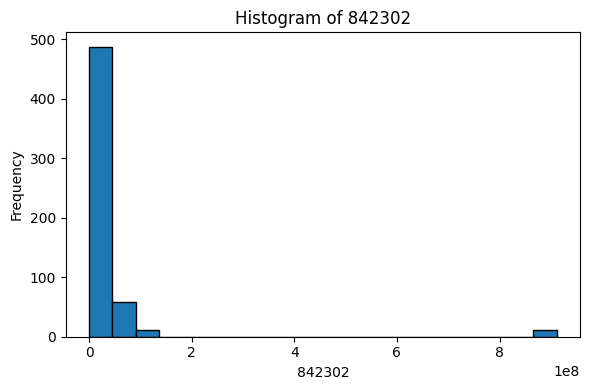

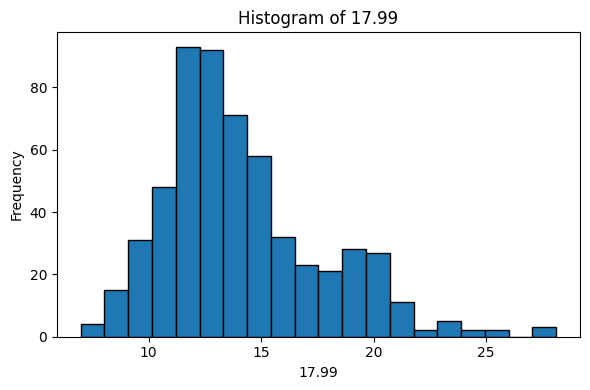

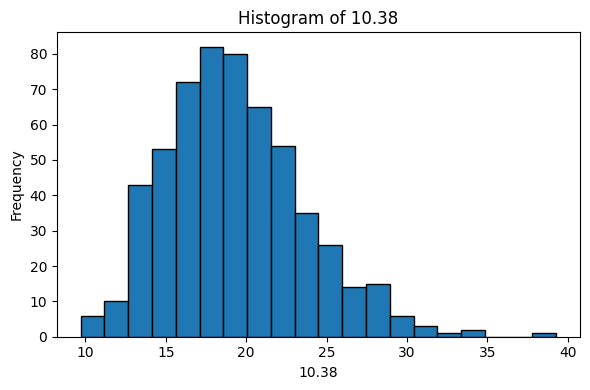

In [ ]:

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols[:3]:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Pie Chart**

Index(['842302', 'M', '17.99', '10.38', '122.8'], dtype='object')
M
B    0.628521
M    0.371479
Name: count, dtype: float64


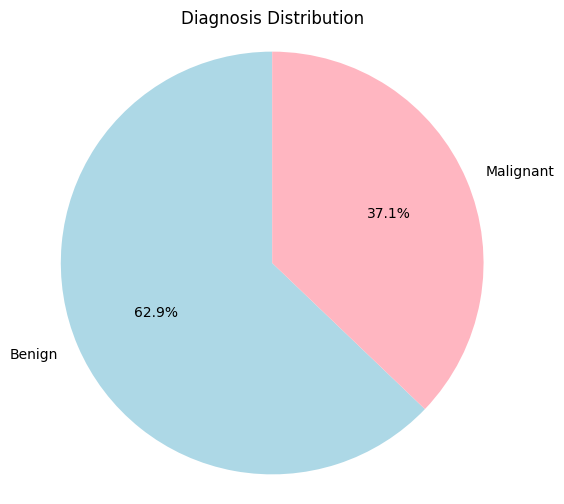

In [ ]:
print(data.columns[:5])
vc = data.iloc[:, 1].value_counts()
print(vc / vc.sum())

label_map = {'B': 'Benign', 'M': 'Malignant'}
names  = [label_map.get(x, str(x)) for x in vc.index.tolist()]
values = vc.values.tolist()

fig = plt.figure(figsize=(6,6))
plt.pie(values, labels=names, autopct='%1.1f%%',
        colors=['#ADD8E6','#FFB6C1'], startangle=90)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()

**Scatter Plot**

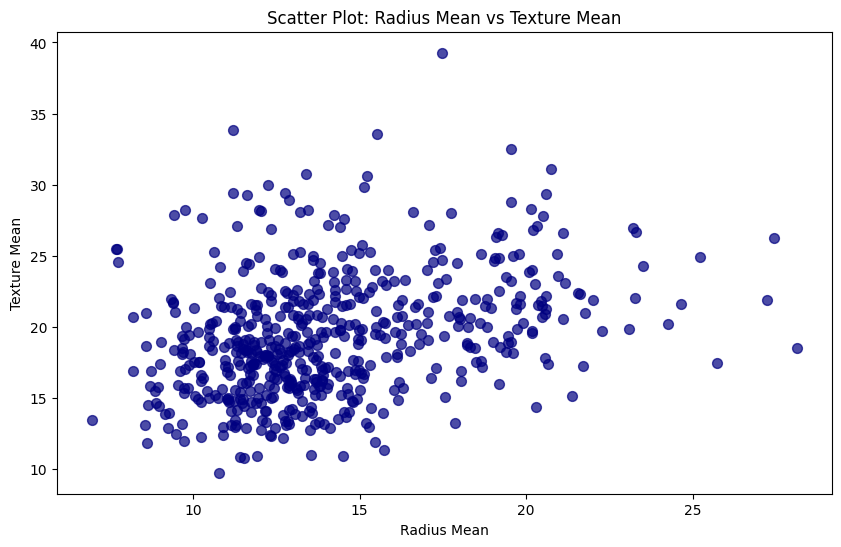

In [ ]:
# Scatter plot: radius_mean vs texture_mean
x = data.iloc[:, 2]   # 3rd column (radius_mean)
y = data.iloc[:, 3]   # 4th column (texture_mean)

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='#000080', marker='o', s=50, alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot: Radius Mean vs Texture Mean')
plt.show()

# **Data Preprocessing:**

**Show Duplicate:**

In [17]:
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
duplicates

Number of duplicate rows: 0


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


# **Removing Duplicate:**

# **Show missing data:**

In [18]:
missing_counts = data.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()

rows_with_missing = data.isnull().sum(axis=1)
print("Number of rows with missing values:", (rows_with_missing > 0).sum())
print("Example rows with missing values:")
print(data[rows_with_missing > 0].head())

Missing values in each column:
842302      0
M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64

Number of rows with missing values: 0
Example rows with missing values:
Empty DataFrame
Columns: [842302, M, 17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
Index: []

[0 rows x 32 columns]


# **Show Outliers:**

In [19]:
from scipy.stats import zscore
import numpy as np

numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)
threshold = 3
outliers = data[(np.abs(z_scores) > threshold).any(axis=1)]

print("Number of outlier rows detected:", outliers.shape[0])
outliers.head()

Number of outlier rows detected: 82


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
11,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.2065,0.11180,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
13,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
22,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.1097,0.08632,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526


# **Box Plot For Outilers :**

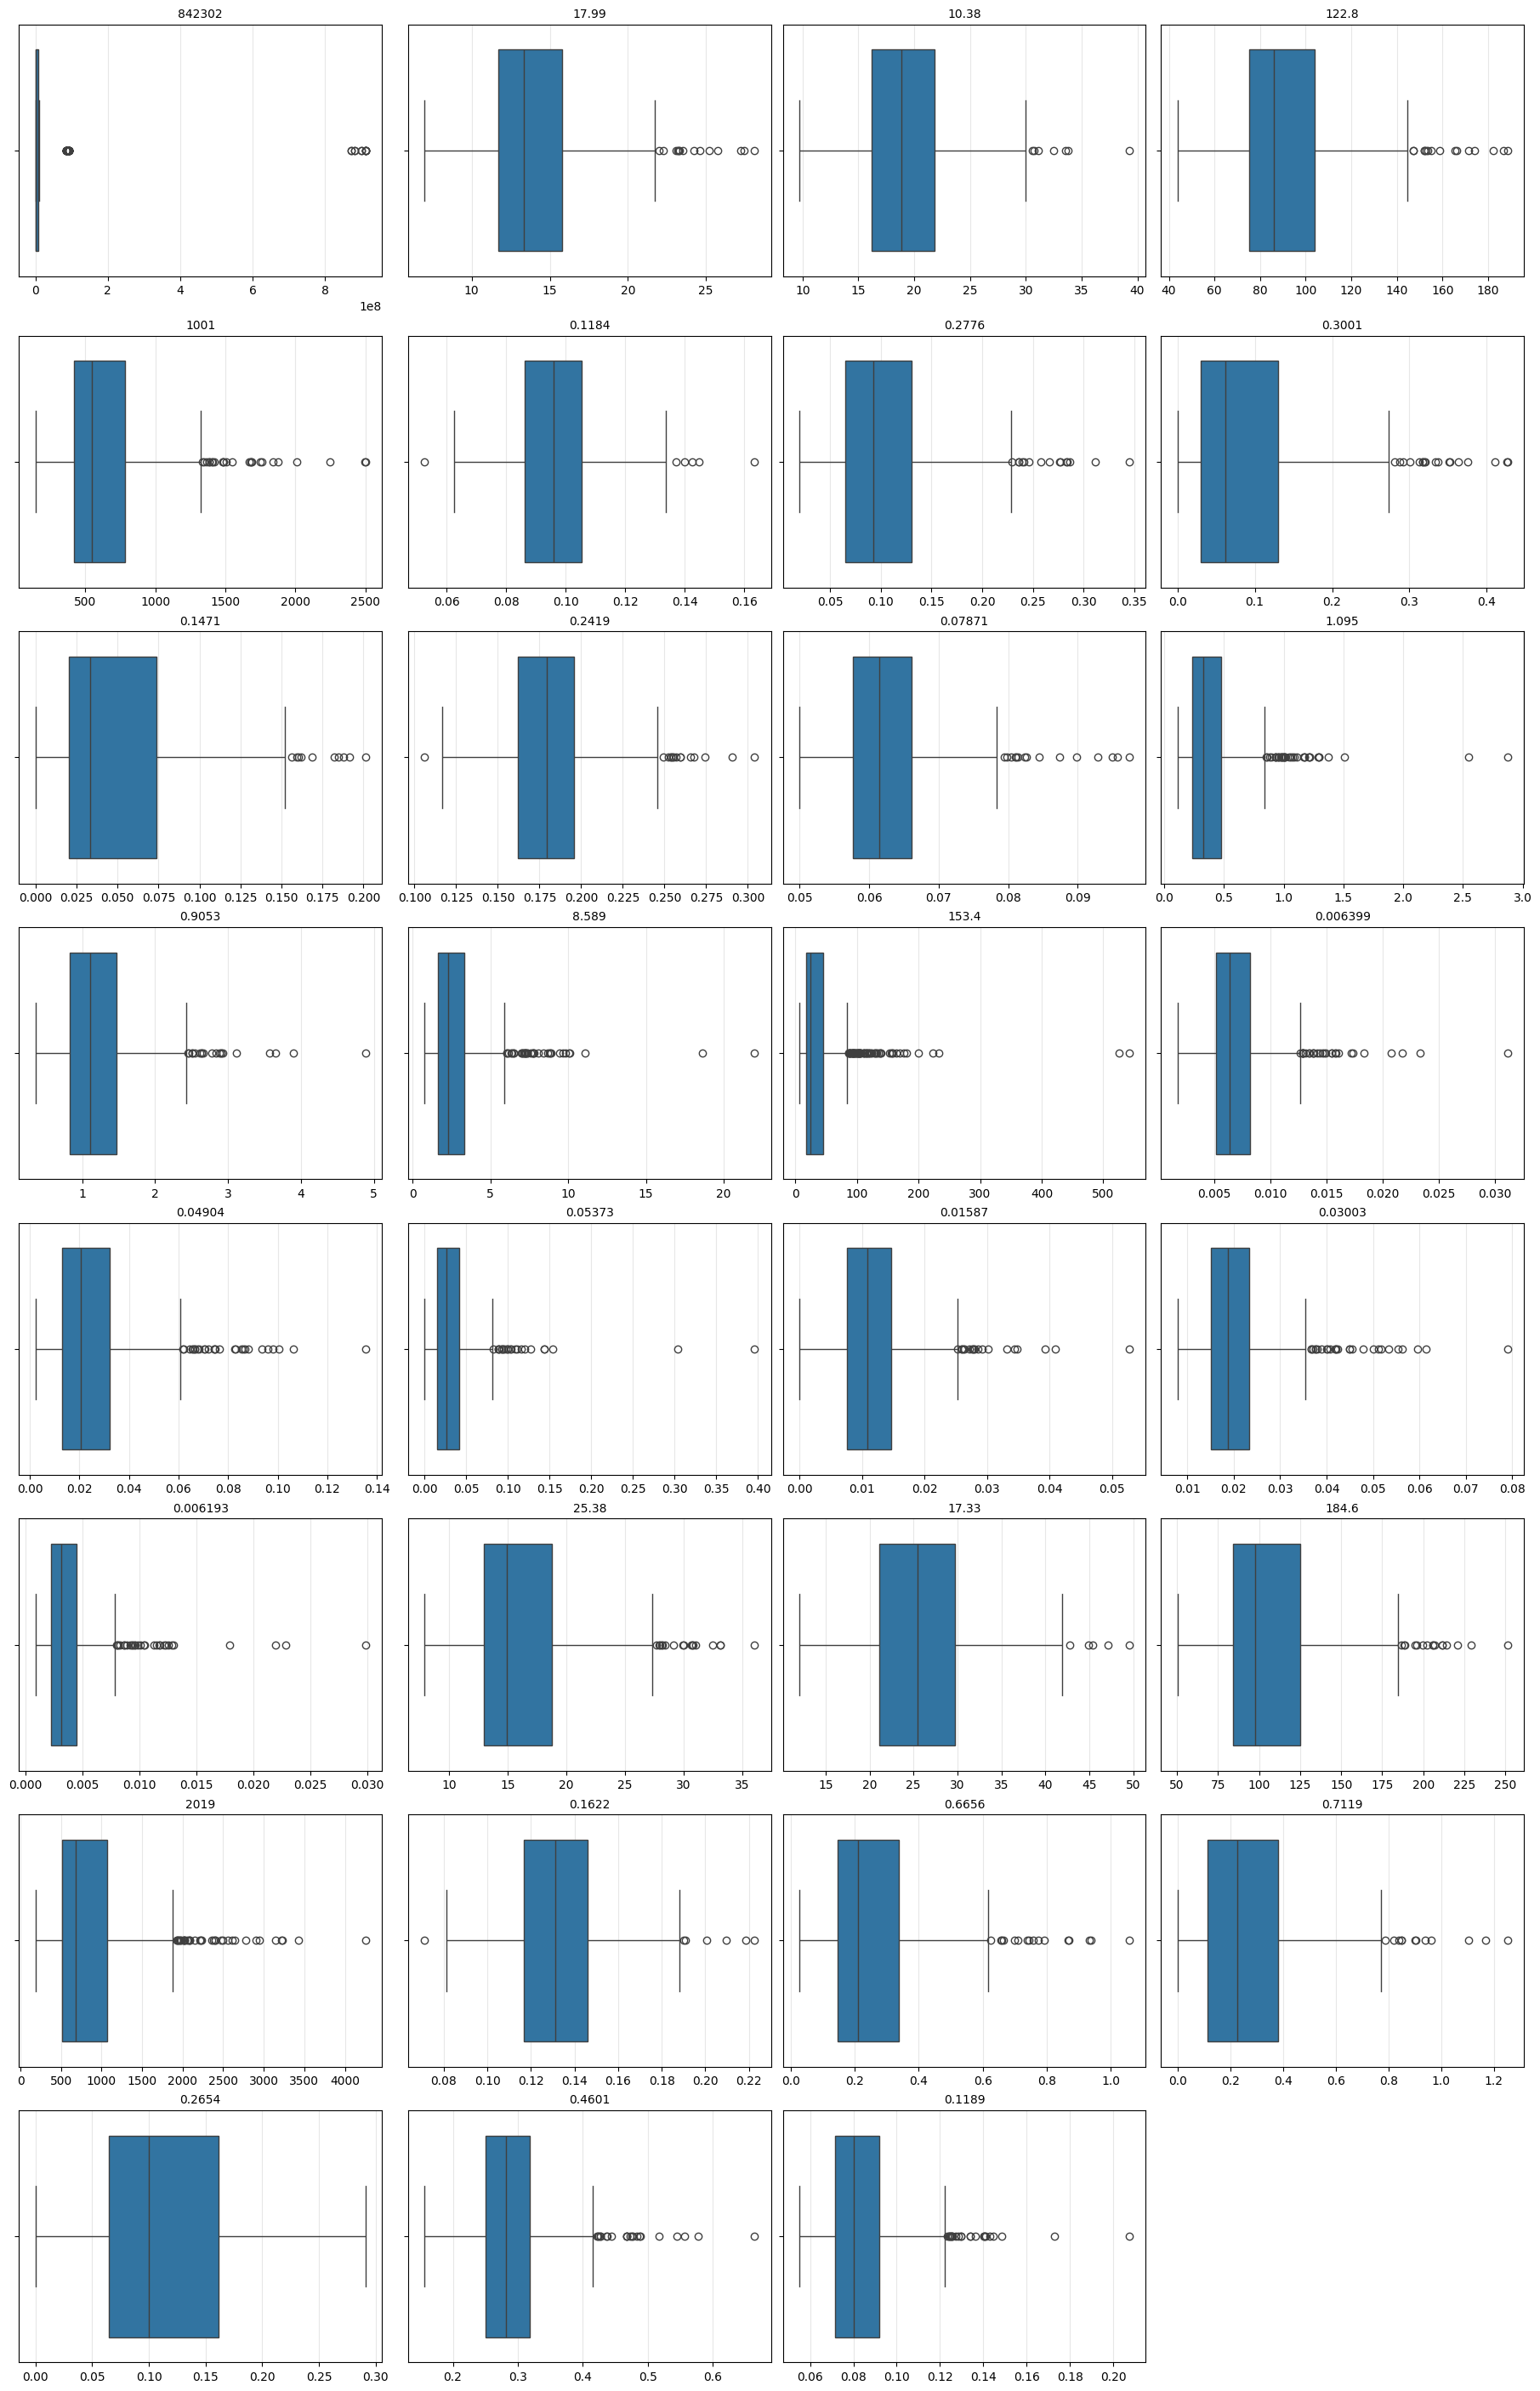

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if 'id' not in c.lower()]
if not num_cols:
    raise ValueError("No numeric columns found.")
n = len(num_cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(4.5*ncols, 3.5*nrows), constrained_layout=True)
axes = np.atleast_1d(axes).ravel()

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=data[col], ax=ax, whis=1.5, showfliers=True)
    ax.set_title(col.replace('_',' ').title(), fontsize=10)
    ax.set_xlabel("")
    ax.grid(axis='x', alpha=.3)

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.show()


# **Removing outliers:**

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

data = pd.read_csv("DataMiningSet.csv", header=None, names=columns)

print("Original shape:", data.shape)

numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)
threshold = 3
outliers = data[(np.abs(z_scores) > threshold).any(axis=1)]

print("Number of outlier rows:", outliers.shape[0])

data_no_outlier = data.drop(outliers.index)

print("New shape after removing outliers:", data_no_outlier.shape)
display(data_no_outlier.head())

Original shape: (569, 32)
Number of outlier rows: 82
New shape after removing outliers: (487, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


# **Correlation Coefficient:**

Correlation coefficient between radius_mean and texture_mean: 0.32
Correlation coefficient between radius_mean and perimeter_mean: 1.00
Correlation coefficient between radius_mean and area_mean: 0.99
Correlation coefficient between radius_mean and smoothness_mean: 0.17
Correlation coefficient between texture_mean and perimeter_mean: 0.33
Correlation coefficient between texture_mean and area_mean: 0.32
Correlation coefficient between texture_mean and smoothness_mean: -0.02
Correlation coefficient between perimeter_mean and area_mean: 0.99
Correlation coefficient between perimeter_mean and smoothness_mean: 0.21
Correlation coefficient between area_mean and smoothness_mean: 0.18


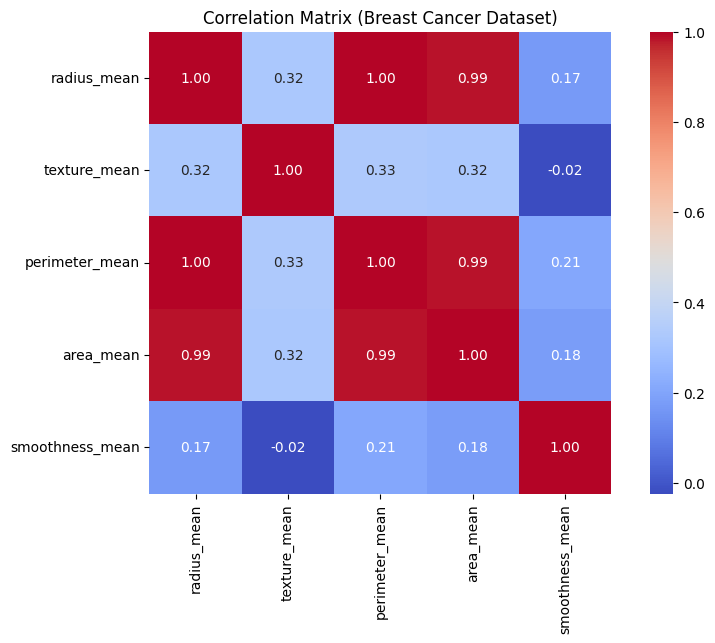

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = data.dropna()
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

correlation_results = {}
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        data_col1 = data[col1]
        data_col2 = data[col2]
        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient:.2f}")

plt.figure(figsize=(10, 6))
correlation_matrix = data[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Breast Cancer Dataset)')
plt.show()


# **Chi Squeare:**

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = ['diagnosis']

for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Tumor Class (diagnosis):")
    contingency_table = pd.crosstab(data[column], data['diagnosis'])
    print("Contingency Table:")
    print(contingency_table)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for diagnosis and Tumor Class (diagnosis):
Contingency Table:
diagnosis    B    M
diagnosis          
B          357    0
M            0  212
Chi-Square Statistic: 564.7302404341926
P-Value: 7.86394182828703e-125
Degrees of Freedom: 1
Expected Frequencies:
[[223.98769772 133.01230228]
 [133.01230228  78.98769772]]


# **Removing attributes with an absolute correlation :**

In [38]:
import numpy as np
import pandas as pd

X = data.select_dtypes(include='number').drop(columns=['id'], errors='ignore')

corr_thr = 0.75
corr = X.corr()

to_remove = set()
cols = corr.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if abs(corr.iloc[i, j]) >= corr_thr and cols[j] not in to_remove and cols[i] not in to_remove:
            to_remove.add(cols[j])

data_filtered = data.drop(columns=list(to_remove), errors='ignore')

print("Removed (high correlation ≥ 0.75):", sorted(to_remove))
print("Original shape:", data.shape, " -> Filtered shape:", data_filtered.shape)
display(data_filtered.head())

Removed (high correlation ≥ 0.75): ['area_mean', 'area_se', 'area_worst', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_se', 'concavity_worst', 'fractal_dimension_se', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_worst', 'smoothness_worst', 'texture_worst']
Original shape: (569, 32)  -> Filtered shape: (569, 15)


,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave_points_se,symmetry_se,symmetry_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


# **Data Transformation:**

**Normaliztion:**

In [41]:
from sklearn.preprocessing import MinMaxScaler

use_data = data_filtered.copy() if 'data_filtered' in globals() else data.copy()

candidates = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
              'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']
cols = [c for c in candidates if c in use_data.columns]

if not cols:
    cols = use_data.select_dtypes(include='number').columns.drop(['id'], errors='ignore')

scaler = MinMaxScaler()
use_data[cols] = scaler.fit_transform(use_data[cols])

print("Normalized columns:", cols)
display(use_data[cols].head())

Normalized columns: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247
3,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816


**Discretization:**

In [44]:
radius_min = data_filtered['radius_mean'].min()
radius_max = data_filtered['radius_mean'].max()

radius_bins = [radius_min, 12, 18, radius_max]
radius_labels = [0, 1, 2]

print(data_filtered['radius_mean'].isna().sum())

data_filtered['radius_mean_bin'] = pd.cut(data_filtered['radius_mean'],
                                        bins=radius_bins,
                                        labels=radius_labels,
                                        include_lowest=True)

print("Discretized Radius Mean:")
print(data_filtered[['radius_mean', 'radius_mean_bin']].head(20))

0
Discretized Radius Mean:
    radius_mean radius_mean_bin
0         17.99               1
1         20.57               2
2         19.69               2
3         11.42               0
4         20.29               2
5         12.45               1
6         18.25               2
7         13.71               1
8         13.00               1
9         12.46               1
10        16.02               1
11        15.78               1
12        19.17               2
13        15.85               1
14        13.73               1
15        14.54               1
16        14.68               1
17        16.13               1
18        19.81               2
19        13.54               1


In [45]:
radius_bins = [data['radius_mean'].min(), 12, 18, data['radius_mean'].max()]
radius_labels = [0, 1, 2]

data_filtered['radius_mean_bin'] = pd.cut(data_filtered['radius_mean'],
                                        bins=radius_bins,
                                        labels=radius_labels,
                                        include_lowest=True)

print("Discretized Radius Mean:")
print(data_filtered[['radius_mean', 'radius_mean_bin']].head(20))

Discretized Radius Mean:
    radius_mean radius_mean_bin
0         17.99               1
1         20.57               2
2         19.69               2
3         11.42               0
4         20.29               2
5         12.45               1
6         18.25               2
7         13.71               1
8         13.00               1
9         12.46               1
10        16.02               1
11        15.78               1
12        19.17               2
13        15.85               1
14        13.73               1
15        14.54               1
16        14.68               1
17        16.13               1
18        19.81               2
19        13.54               1


**Encoding**

**Correlation-based Feature Selection:**

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

X = data_filtered.drop(columns=['id', 'diagnosis'])
y = data_filtered['diagnosis']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y_encoded)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['radius_mean', 'radius_mean_bin']


**Wrapper Methods**

# **Recursive Feature Elimination:**

**Results:**

# **Embedded Methods**

**L1 Regularization:**

# **Save the dataset after preprocessing :**